# Tutorial 10: A Guide to Symmetric Spaces

This tutorial explores the `symmetric_space` module, which provides the foundation for working with function spaces on geometric manifolds like the circle and the sphere.

### Mathematical Background

1.  **The L² Space:** The space $L^2(X)$ is the space of all "square-integrable" functions on a manifold $X$. This means that for any function $u \in L^2(X)$, the integral of its square over the manifold is finite. The inner product between two functions $u$ and $v$ is defined as:
    $$
    \langle u, v \rangle_{L^2} = \int_X u(x) v(x) dV
    $$
    where $dV$ is the volume element. The L² space is the natural setting for functions with finite energy or power.

2.  **The Sobolev Space ($H^s$):** A Sobolev space $H^s(X)$ is a refinement of L² that also considers the smoothness of functions. It contains functions whose derivatives up to a certain order are also in L². The Sobolev `order`, $s$, controls this smoothness requirement. The inner product in a Sobolev space includes terms related to the derivatives, which penalizes functions that are not smooth. For this reason, samples from a `GaussianMeasure` with a Sobolev covariance are guaranteed to be smooth.

3.  **The Laplace-Beltrami Operator ($\Delta$):** On a geometric manifold, the Laplacian $\Delta$ is a differential operator that measures the "curvature" of a function. Its eigenfunctions form a natural basis for the function space (e.g., Fourier modes on the circle, spherical harmonics on the sphere). Operators that are functions of the Laplacian, $f(\Delta)$, are **invariant** under the symmetries of the space (like rotation).

In this tutorial, we will:
1.  See how L² and Sobolev spaces are implemented for the circle and sphere.
2.  Explore how to create invariant operators using `invariant_automorphism`.
3.  Demonstrate the creation of invariant `GaussianMeasure`s on these spaces.

In [1]:
# To run in colab, uncomment the line below to install pygeoinf. 
#%pip install pygeoinf

import numpy as np
import matplotlib.pyplot as plt
import pygeoinf as inf
from pygeoinf.symmetric_space.circle import Sobolev as CircleSobolev
from pygeoinf.symmetric_space.sphere import Sobolev as SphereSobolev

## 1. Practical Implementations

The library provides concrete implementations of these function spaces for the circle and the sphere.

* **Circle:** Functions are represented by a truncated **Fourier series**. The basis functions are sines and cosines. The Laplacian eigenvalues are $\lambda_k = (k/R)^2$.
* **Sphere:** Functions are represented by a truncated **spherical harmonic expansion**. The basis functions are the spherical harmonics $Y_{lm}$. The Laplacian eigenvalues are $\lambda_l = l(l+1)/R^2$.

In both cases, a `Sobolev` space is implemented as a `MassWeightedHilbertSpace` over the corresponding `Lebesgue` (L²) space.

In [2]:
# Create instances of the Sobolev spaces for both geometries
circle_space = CircleSobolev.from_sobolev_parameters(3.0, 0.2)
sphere_space = SphereSobolev.from_sobolev_parameters(3.0, 0.2)

print(f"A 'vector' in the circle space is a {type(circle_space.zero)} with shape {circle_space.zero.shape}")
print(f"A 'vector' in the sphere space is a {type(sphere_space.zero)} object")

A 'vector' in the circle space is a <class 'numpy.ndarray'> with shape (84,)
A 'vector' in the sphere space is a <class 'pyshtools.shclasses.shgrid.DHRealGrid'> object


## 2. Invariant Operators: Functions of the Laplacian

A key feature of the symmetric space framework is the ability to create **invariant operators** of the form $f(\Delta)$ using the `invariant_automorphism` method. Because these operators are diagonal in the natural basis (Fourier or spherical harmonic), they are very efficient to represent.

For example, we can create an operator that represents the inverse Laplacian, $(\Delta)^{-1}$, which acts as a smoothing operator.

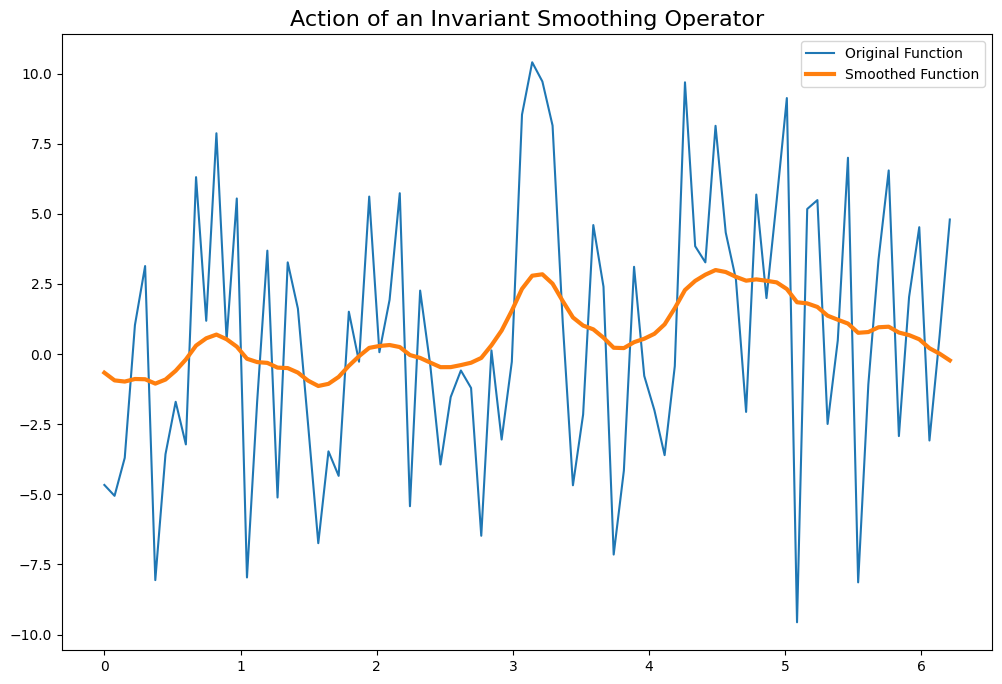

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [3]:
# Create a test function on the circle (a mix of high and low frequencies)
np.random.seed(1)
test_func_circle = circle_space.random()

# Create a smoothing operator C = (I - 0.1*Δ)^-1
# The function f takes the eigenvalue as input
smoothing_op = circle_space.invariant_automorphism(lambda eig: (1 + 0.1 * eig)**-1.0)

# Apply the operator
smoothed_func_circle = smoothing_op(test_func_circle)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
circle_space.plot(test_func_circle, ax=ax, label='Original Function')
circle_space.plot(smoothed_func_circle, ax=ax, label='Smoothed Function', linewidth=3)
ax.set_title("Action of an Invariant Smoothing Operator", fontsize=16)
ax.legend()
plt.show()

## 3. Invariant Gaussian Measures

This same principle allows us to create `GaussianMeasure`s whose statistics are invariant under the symmetries of the space (i.e., rotationally invariant). This is done by defining the covariance operator to be a function of the Laplacian, $C = f(\Delta)$.

The `symmetric_space` module provides several convenient methods for this, such as the `heat_kernel_gaussian_measure`. A heat kernel produces very smooth, correlated random functions. Let's create and visualize samples on both the circle and the sphere.

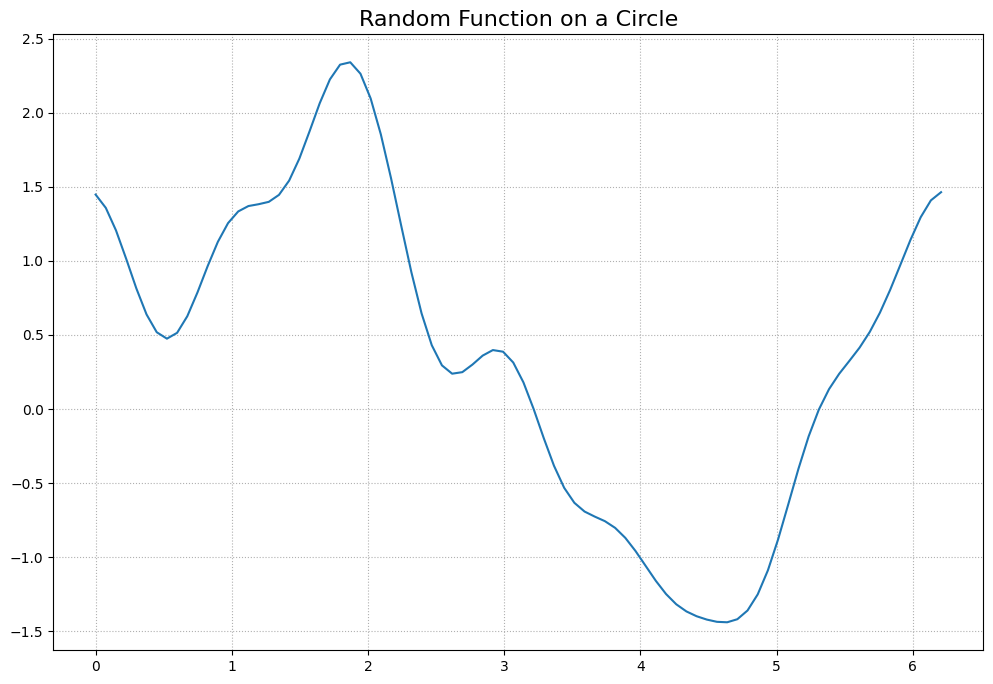

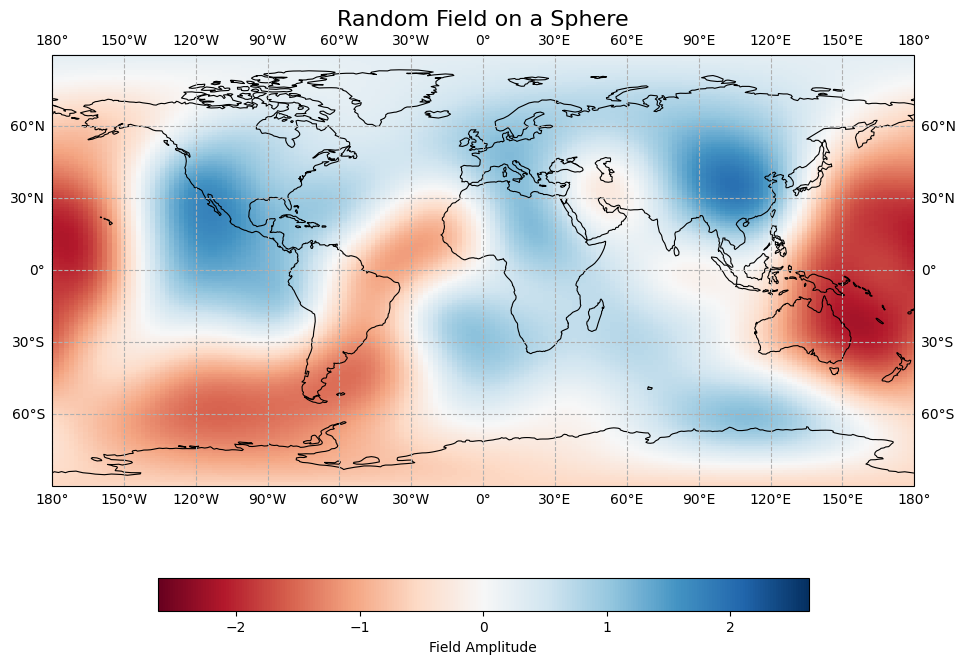

In [4]:

# --- 1. Invariant Measure on the Circle ---
circle_measure = circle_space.point_value_scaled_heat_kernel_gaussian_measure(
    scale=0.2, amplitude=1.0
)
circle_sample = circle_measure.sample()

# --- 2. Invariant Measure on the Sphere ---
sphere_measure = sphere_space.point_value_scaled_heat_kernel_gaussian_measure(
    scale=0.2, amplitude=1.0
)
sphere_sample = sphere_measure.sample()

# --- Plot the results in two separate figures ---

# Figure 1: Plot the sample on the circle
fig1, ax1 = plt.subplots(figsize=(12, 8))
circle_space.plot(circle_sample, fig=fig1, ax=ax1)
ax1.set_title('Random Function on a Circle', fontsize=16)
ax1.grid(True, linestyle=":")
plt.show()

# Figure 2: Plot the sample on the sphere

fig2, ax2, im = sphere_space.plot(sphere_sample, figsize=(12,8), coasts=True, symmetric=True)
ax2.set_title('Random Field on a Sphere', fontsize=16)
fig2.colorbar(im, ax=ax2, orientation='horizontal', shrink=0.7, label='Field Amplitude')
plt.show()

